> 해당 자료는 전북대학교 이영미 교수님 2023고급시계열분석 자료임

# 패키지 설치

In [12]:
library(lmtest) # Dw test
library(ggplot2)
library(lubridate)  # 날짜 다루는 패키지

In [13]:
options(repr.plot.width = 15, repr.plot.height = 8)

# 국내총인구

In [14]:
z <- scan("population.txt")
head(z)

[1] 25012374 25765673 26513030 27261747 27984155 28704674

In [16]:
pop = round(z/10000)
head(pop)

[1] 2501 2577 2651 2726 2798 2870

In [17]:
tmp.data <- data.frame(
 day = seq(ymd("1960-01-01"),by='year', length.out=length(z)),  #60년 1월 1일부터 연단위로, 데이터길이는 z와 동일하게.
 #day = 1959 + 1:length(z),
 pop = round(z/10000),
 t = 1:length(z),
 t2 = (1:length(z))^2
)
head(tmp.data)

,day,pop,t,t2
,<date>,<dbl>,<int>,<dbl>
1,1960-01-01,2501,1,1
2,1961-01-01,2577,2,4
3,1962-01-01,2651,3,9
4,1963-01-01,2726,4,16
5,1964-01-01,2798,5,25
6,1965-01-01,2870,6,36


# 시도표그리기

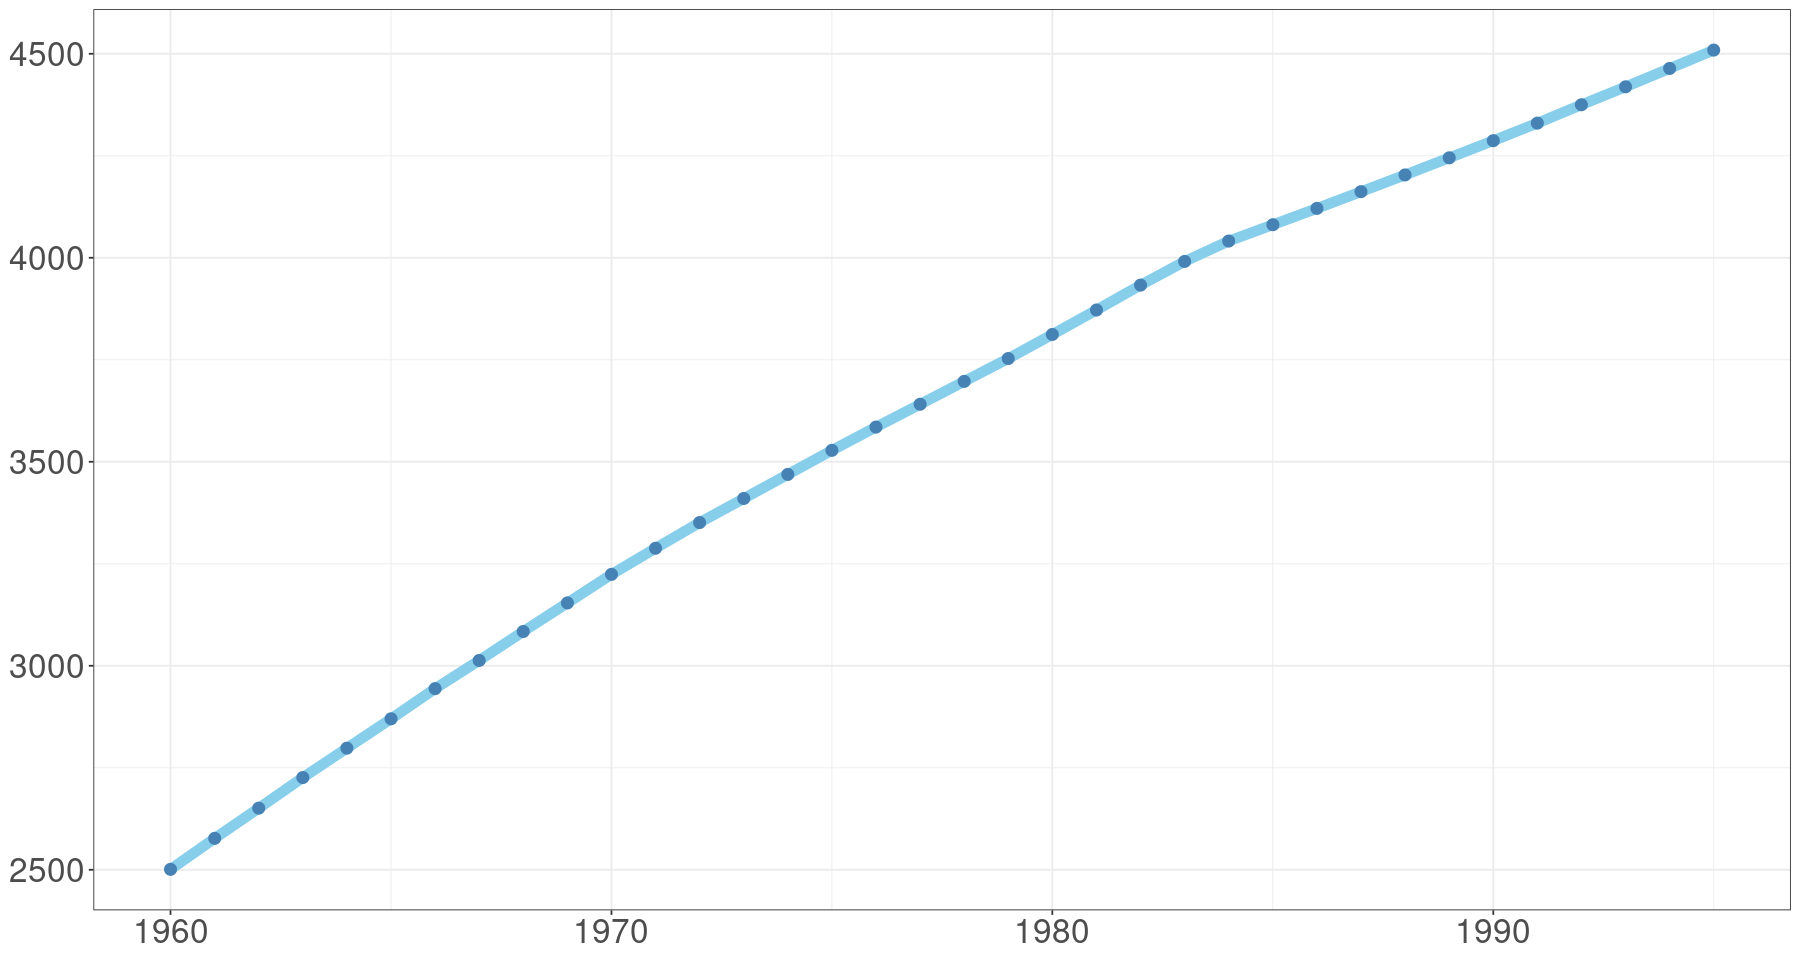

In [18]:
ggplot(tmp.data, aes(day, pop)) +
 geom_line(col='skyblue', lwd=3) +
 geom_point(col='steelblue', cex=3)+
 theme_bw() +
 #scale_x_date(date_labels = "%Y-%m") +
 theme(axis.title=element_blank(),    # ggplot 배경 변경
 axis.text= element_text(size=20))

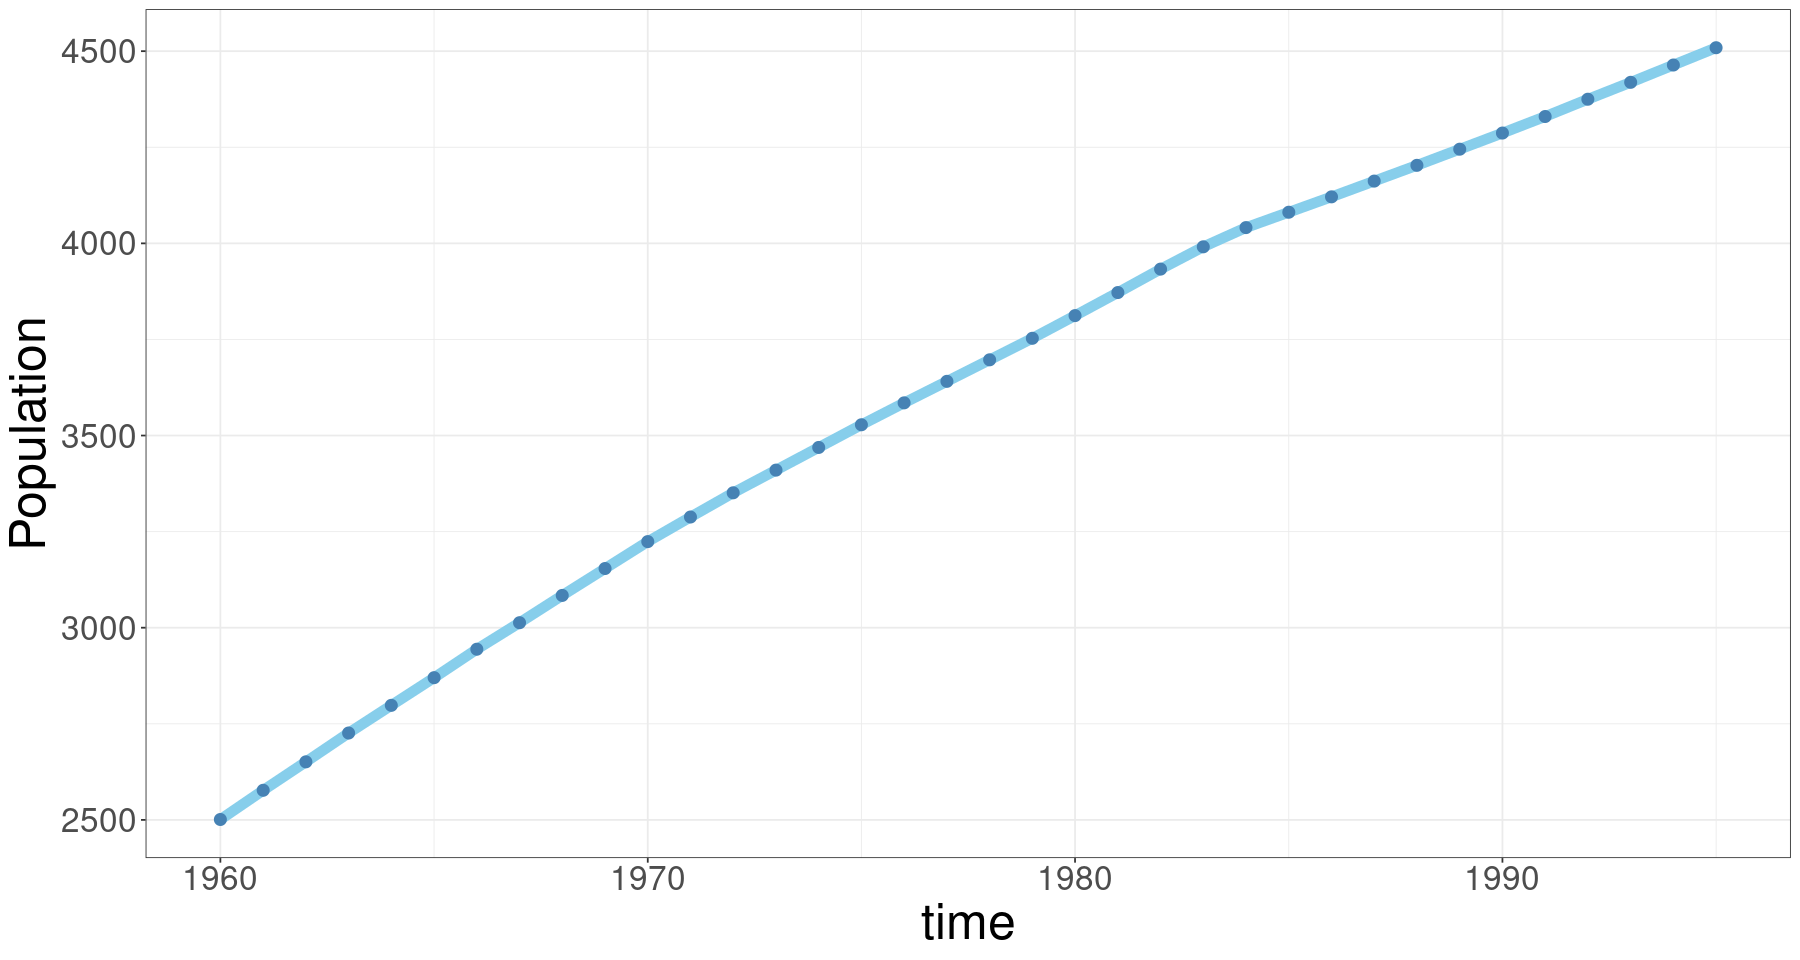

In [19]:
ggplot(tmp.data, aes(day, pop)) +
 geom_line(col='skyblue', lwd=3) +
 geom_point(col='steelblue', cex=3)+
 xlab("time") + ylab("Population")+
 theme_bw() +
 #scale_x_date(date_labels = "%Y-%m") +
 theme(axis.text= element_text(size=20),
 axis.title= element_text(size=30))

# 1차 선형 추세 모형

$$\text{모형}: Z_t = \beta_0 + \beta_1 t + \epsilon_t, t=1,\dots, n$$

In [20]:
m1 <- lm(pop~t, data=tmp.data)
summary(m1)



Call:
lm(formula = pop ~ t, data = tmp.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-115.40  -48.30   16.87   54.37   63.29 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2559.3889    20.0385  127.72   <2e-16 ***
t             57.0135     0.9444   60.37   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 58.87 on 34 degrees of freedom
Multiple R-squared:  0.9908,	Adjusted R-squared:  0.9905 
F-statistic:  3644 on 1 and 34 DF,  p-value: < 2.2e-16


integer(0)

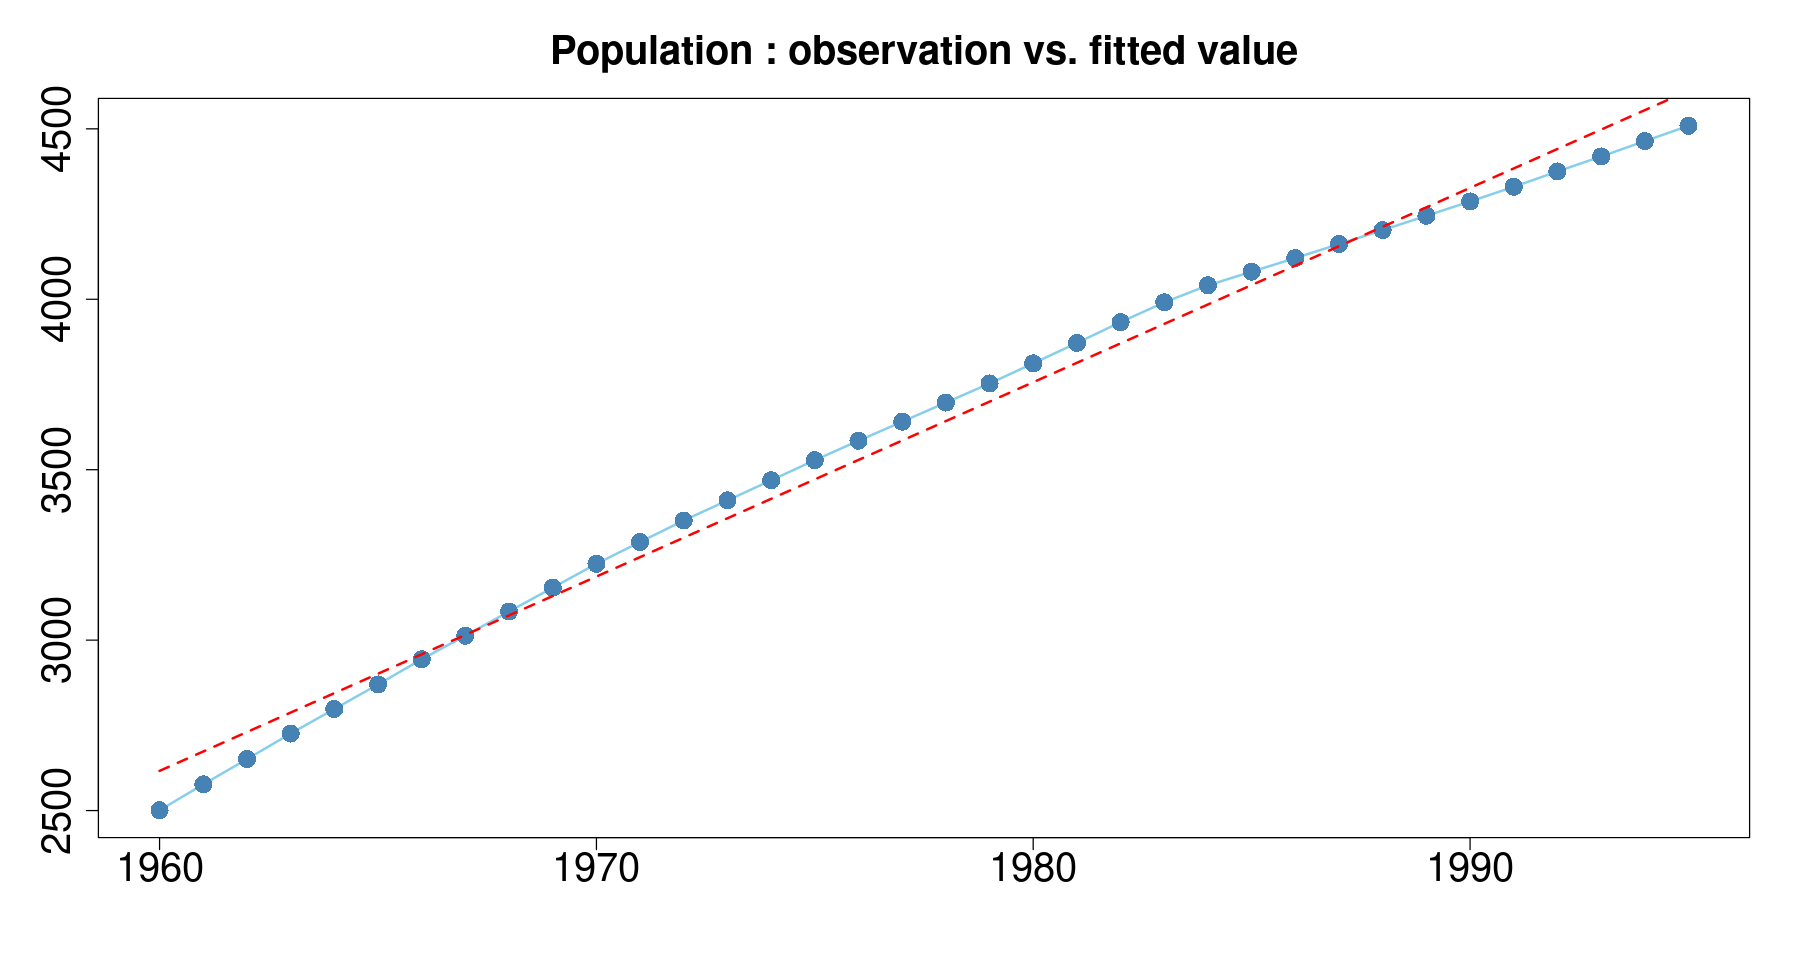

In [21]:
plot(pop~day, tmp.data,
 main = 'Population : observation vs. fitted value',
 xlab="", ylab="",
 type='l',
 col='skyblue',
 lwd=2, cex.axis=2, cex.main=2) +
 points(pop~day, tmp.data, col="steelblue", cex=2, pch=16) +
 lines(tmp.data$day, fitted(m1), col='red', lty=2, lwd=2)


## 잔차분석

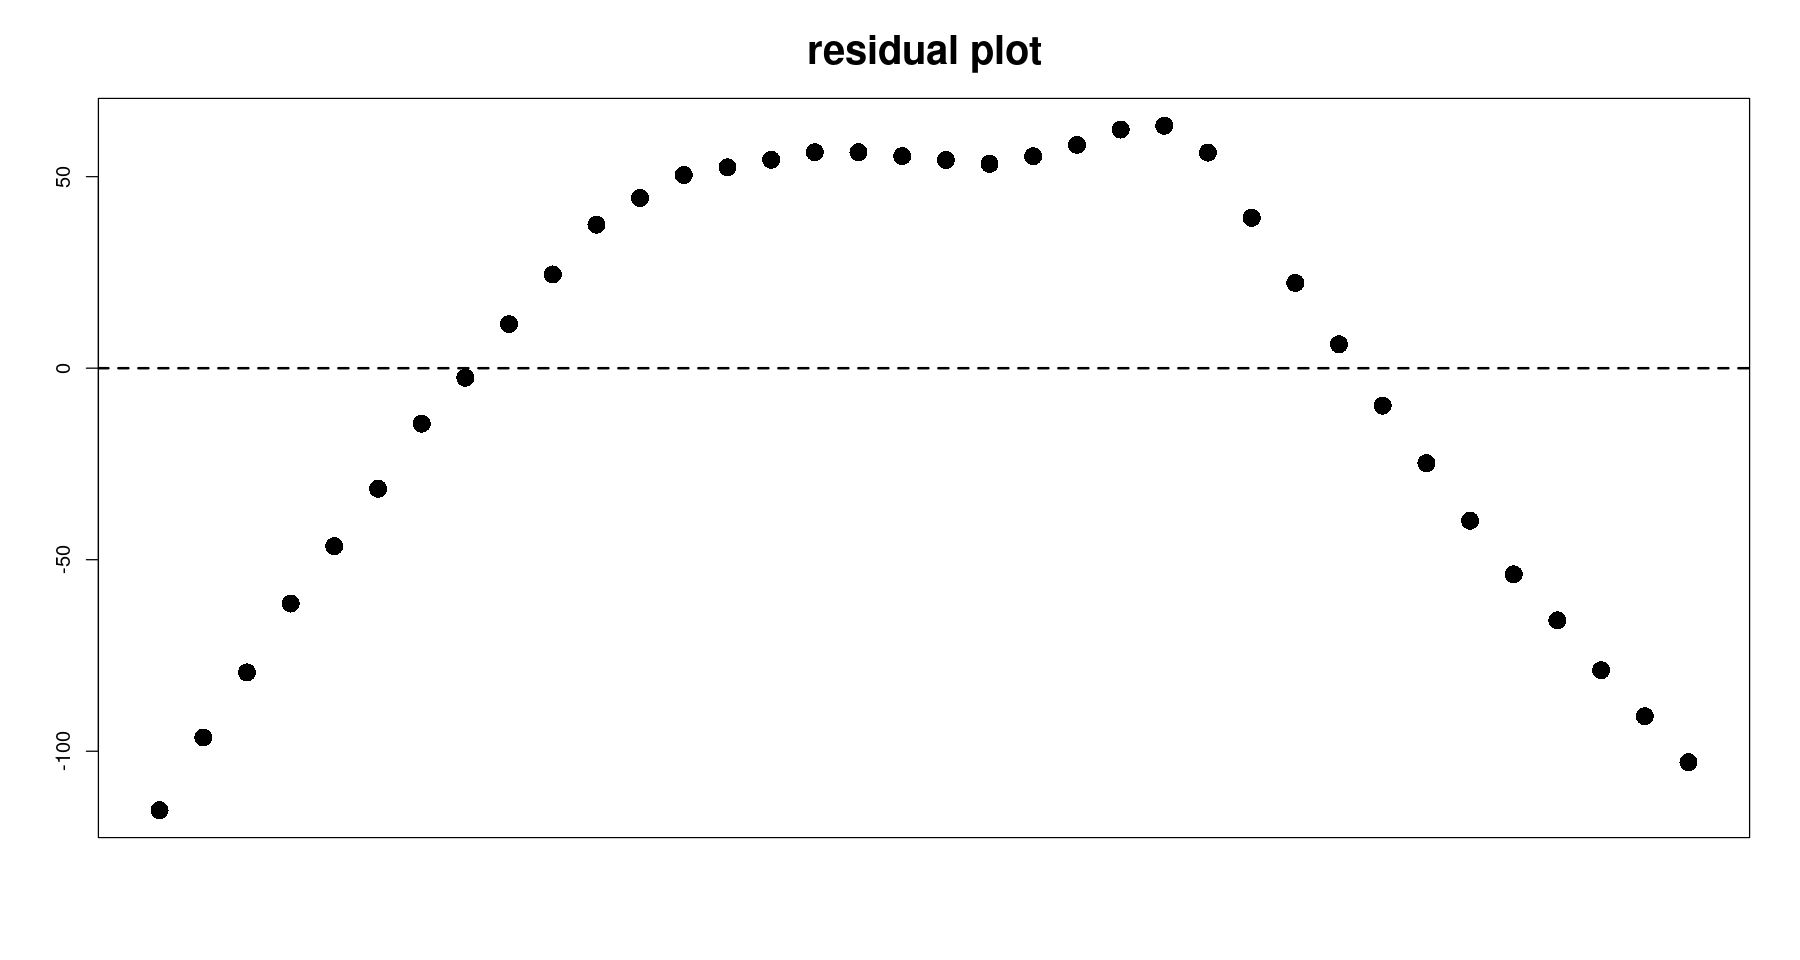

In [22]:
plot(tmp.data$day, resid(m1),
     pch=16, cex=2, xaxt='n',
     xlab="", ylab="", main="residual plot", cex.main=2)
abline(h=0, lty=2, lwd=2)


## 독립성검정(DW test)

In [23]:
dwtest(m1)


	Durbin-Watson test

data:  m1
DW = 0.041645, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


- 아무 옵션이 없으면 0보다 크냐는게 기본!! 대립가설확인필요

In [24]:
dwtest(m1, alternative="two.sided")


	Durbin-Watson test

data:  m1
DW = 0.041645, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is not 0


- 양측검정

In [25]:
dwtest(m1, alternative="less")


	Durbin-Watson test

data:  m1
DW = 0.041645, p-value = 1
alternative hypothesis: true autocorrelation is less than 0


## 정규분포 검정(shapro-wilk test)

`-` 가설

$H_0$: 정규분포를 따른다. VS $H_1$: 정규분포를 따르지 않는다.

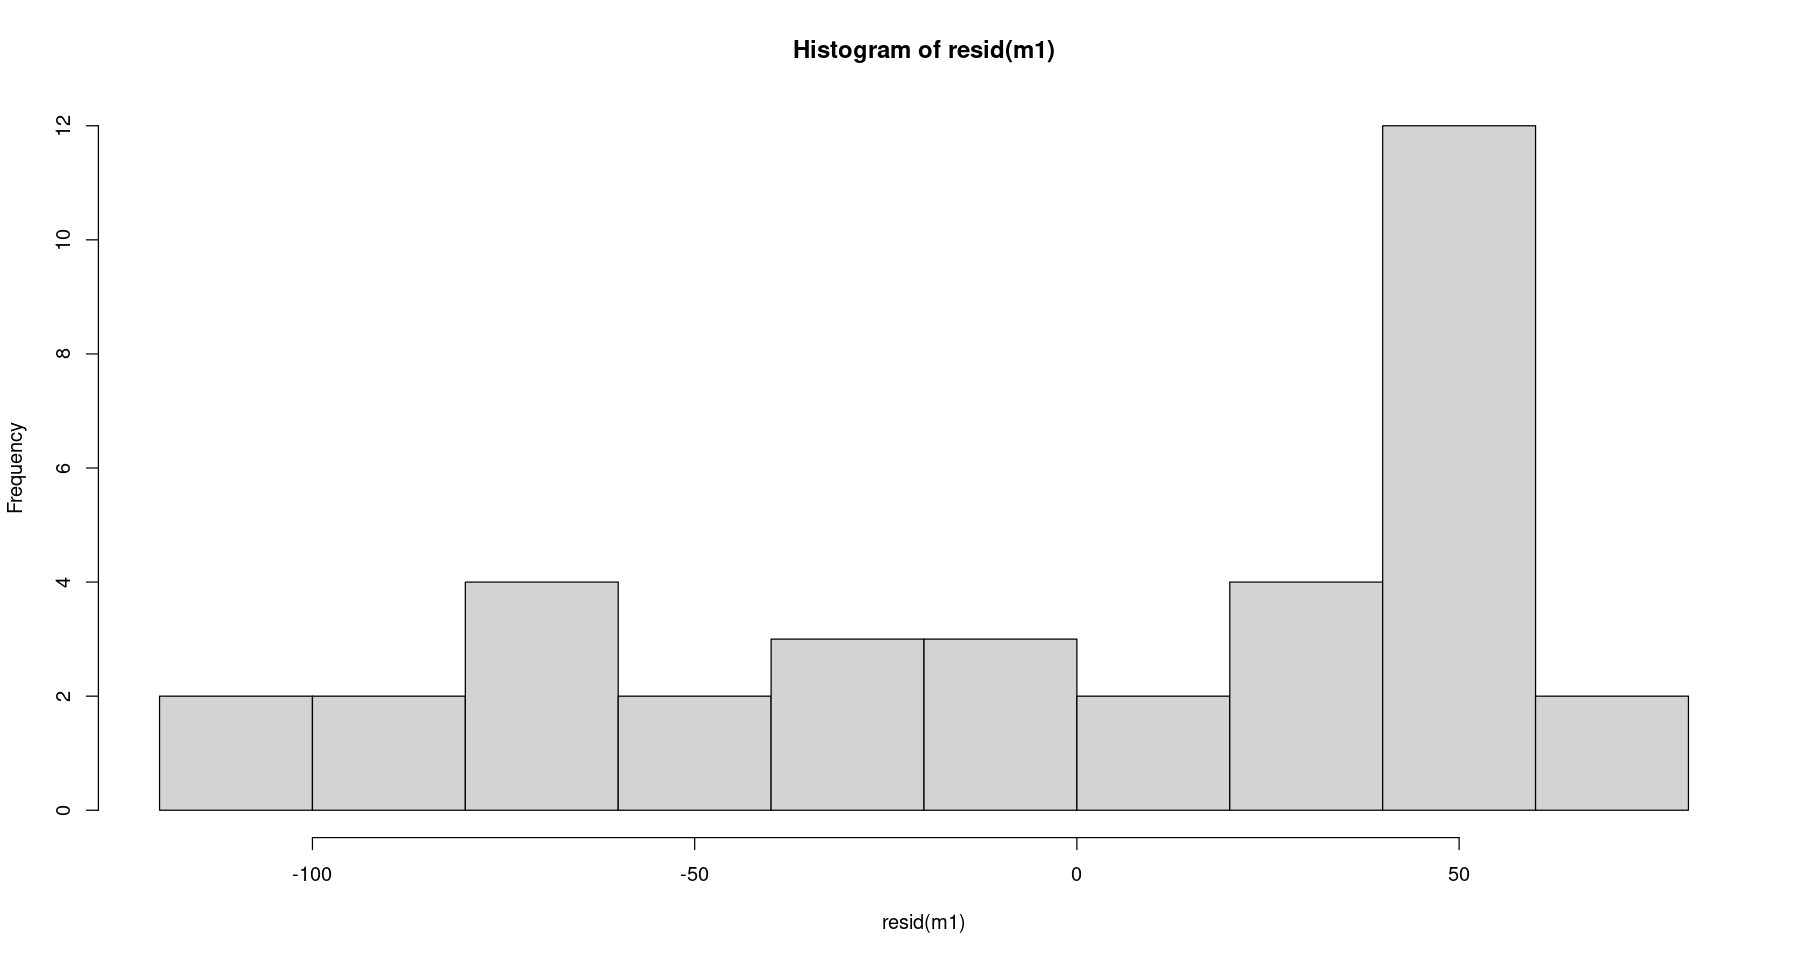

In [26]:
hist(resid(m1))


- 왼쪽으로 치우쳐져 있는 그림. 정규분포가 아닐거 같다.

In [27]:
shapiro.test(resid(m1)) #H_0 : 정규분포를 따른다.



	Shapiro-Wilk normality test

data:  resid(m1)
W = 0.87284, p-value = 0.000669


## 등분산성검정(Breusch–Pagan test)

`-` 가설

$H_0$: 등분산 VS $H_1$: 이분산

In [29]:
bptest(m1)



	studentized Breusch-Pagan test

data:  m1
BP = 0.0059664, df = 1, p-value = 0.9384


- 잔차에 대한 bptest를 한다. 위에 shapiro는 resid(m1)해줬지만 bptest는 그냥 바로 넣어 주면 된다.

- pvalue값이 엄청 커서 기각 못함. 즉 등분산이다.

# 2차 선형 추세

$$\text{모형}: Z_t = \beta_0 + \beta_1 t + \beta_2 t^2 + \epsilon_t, t=1,\dots, n$$

In [30]:
m2 <- lm(pop~t+t2, data=tmp.data)
summary(m2)



Call:
lm(formula = pop ~ t + t2, data = tmp.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.365  -4.779  -1.049   3.798  17.631 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2421.49090    4.05820  596.69   <2e-16 ***
t             78.78688    0.50576  155.78   <2e-16 ***
t2            -0.58847    0.01326  -44.38   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.67 on 33 degrees of freedom
Multiple R-squared:  0.9998,	Adjusted R-squared:  0.9998 
F-statistic: 1.083e+05 on 2 and 33 DF,  p-value: < 2.2e-16


- t2말고 $I(t^2)$으로 작성해줘도 된다. 대신 $t^2$으로 하게 되면 오류가 나니까 I지시함수 꼭 써주기

integer(0)

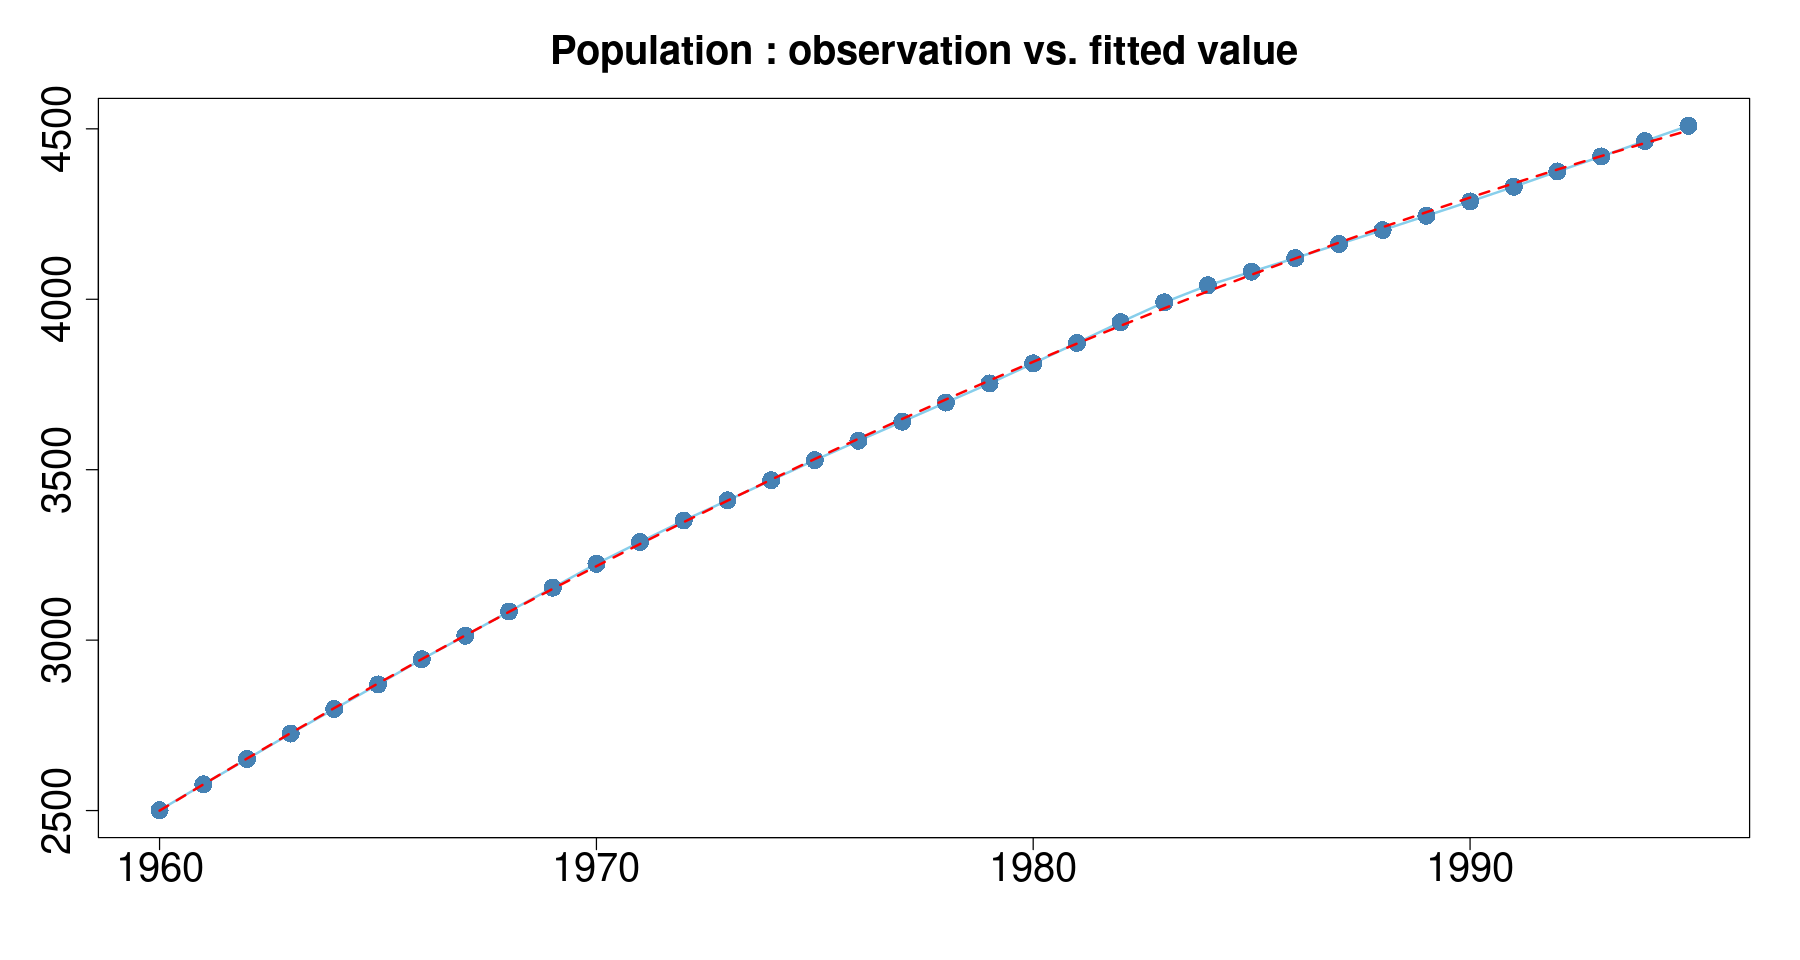

In [31]:
plot(pop~day, tmp.data,
 main = 'Population : observation vs. fitted value',
 xlab="", ylab="",
 type='l',
 col='skyblue',
 lwd=2, cex.axis=2, cex.main=2) +
 points(pop~day, tmp.data, col="steelblue", cex=2, pch=16) +
 lines(tmp.data$day, fitted(m2), col='red', lty=2, lwd=2)

## 잔차분석

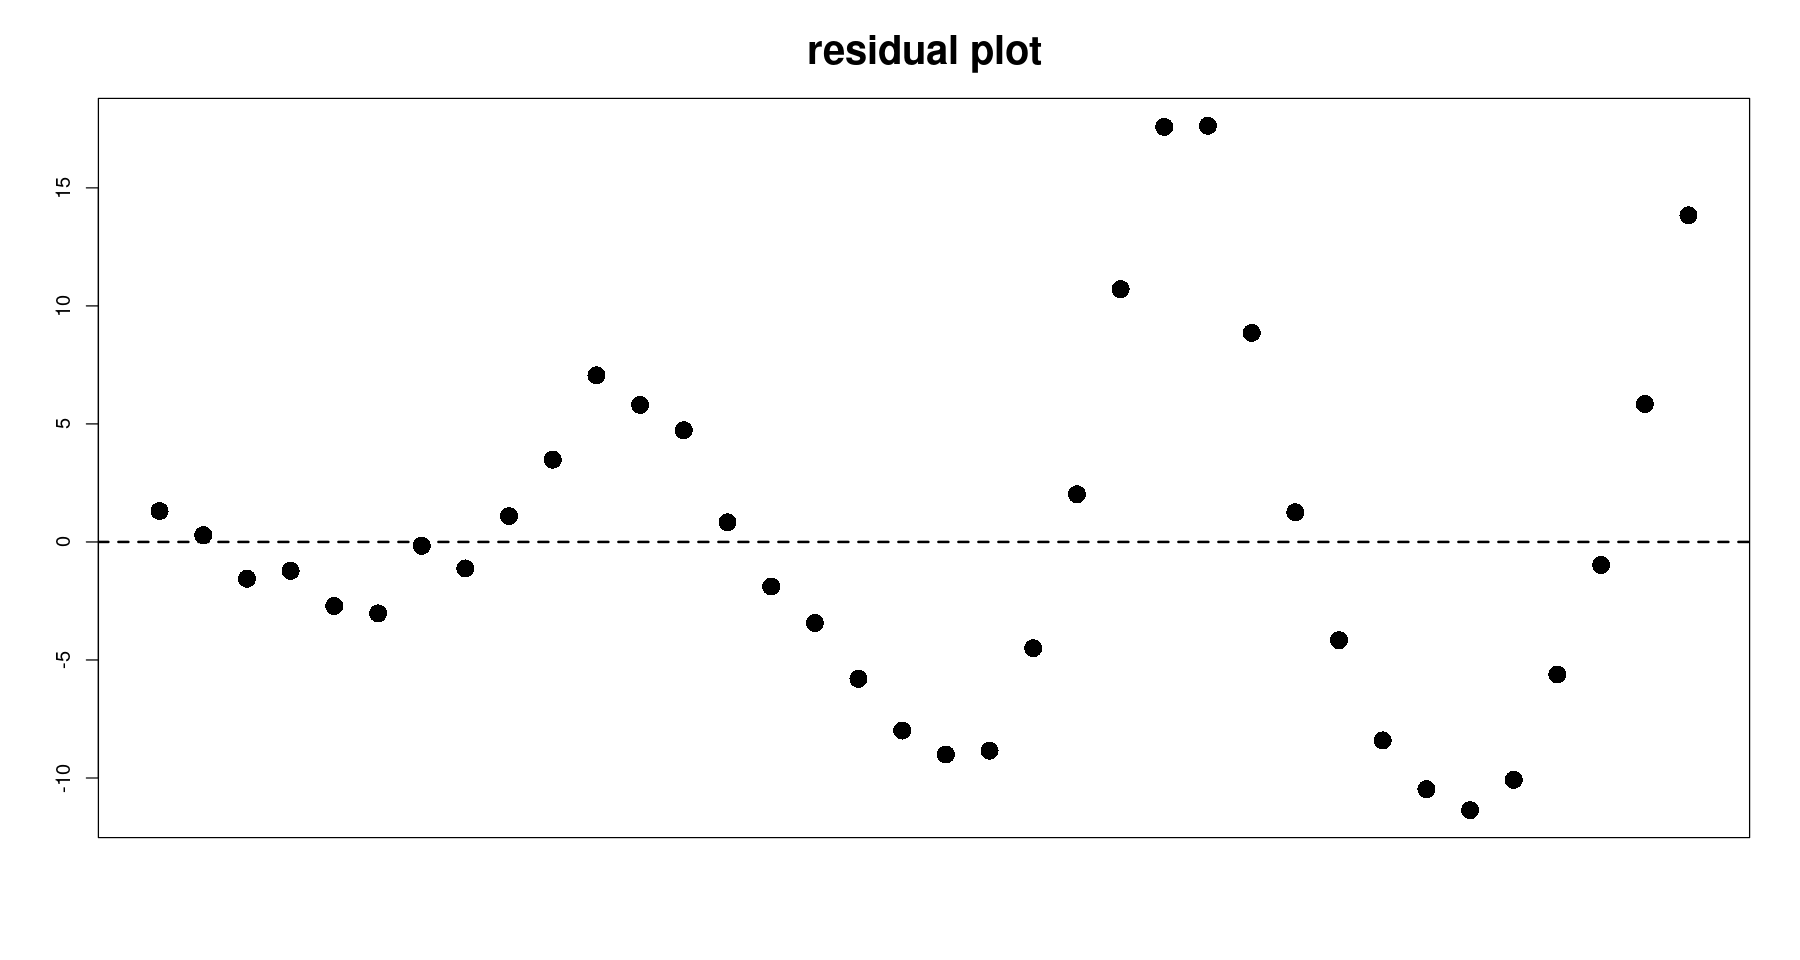

In [32]:
plot(tmp.data$day, resid(m2),
 pch=16, cex=2, xaxt='n',
 xlab="", ylab="", main="residual plot", cex.main=2)
abline(h=0, lty=2, lwd=2)


## 독립성 검정(DW test)

In [33]:
dwtest(m2,alternative = "two.sided")


	Durbin-Watson test

data:  m2
DW = 0.31083, p-value = 1.744e-13
alternative hypothesis: true autocorrelation is not 0


In [34]:
dwtest(m2,alternative = "greater")



	Durbin-Watson test

data:  m2
DW = 0.31083, p-value = 8.72e-14
alternative hypothesis: true autocorrelation is greater than 0


## 정규성 검정

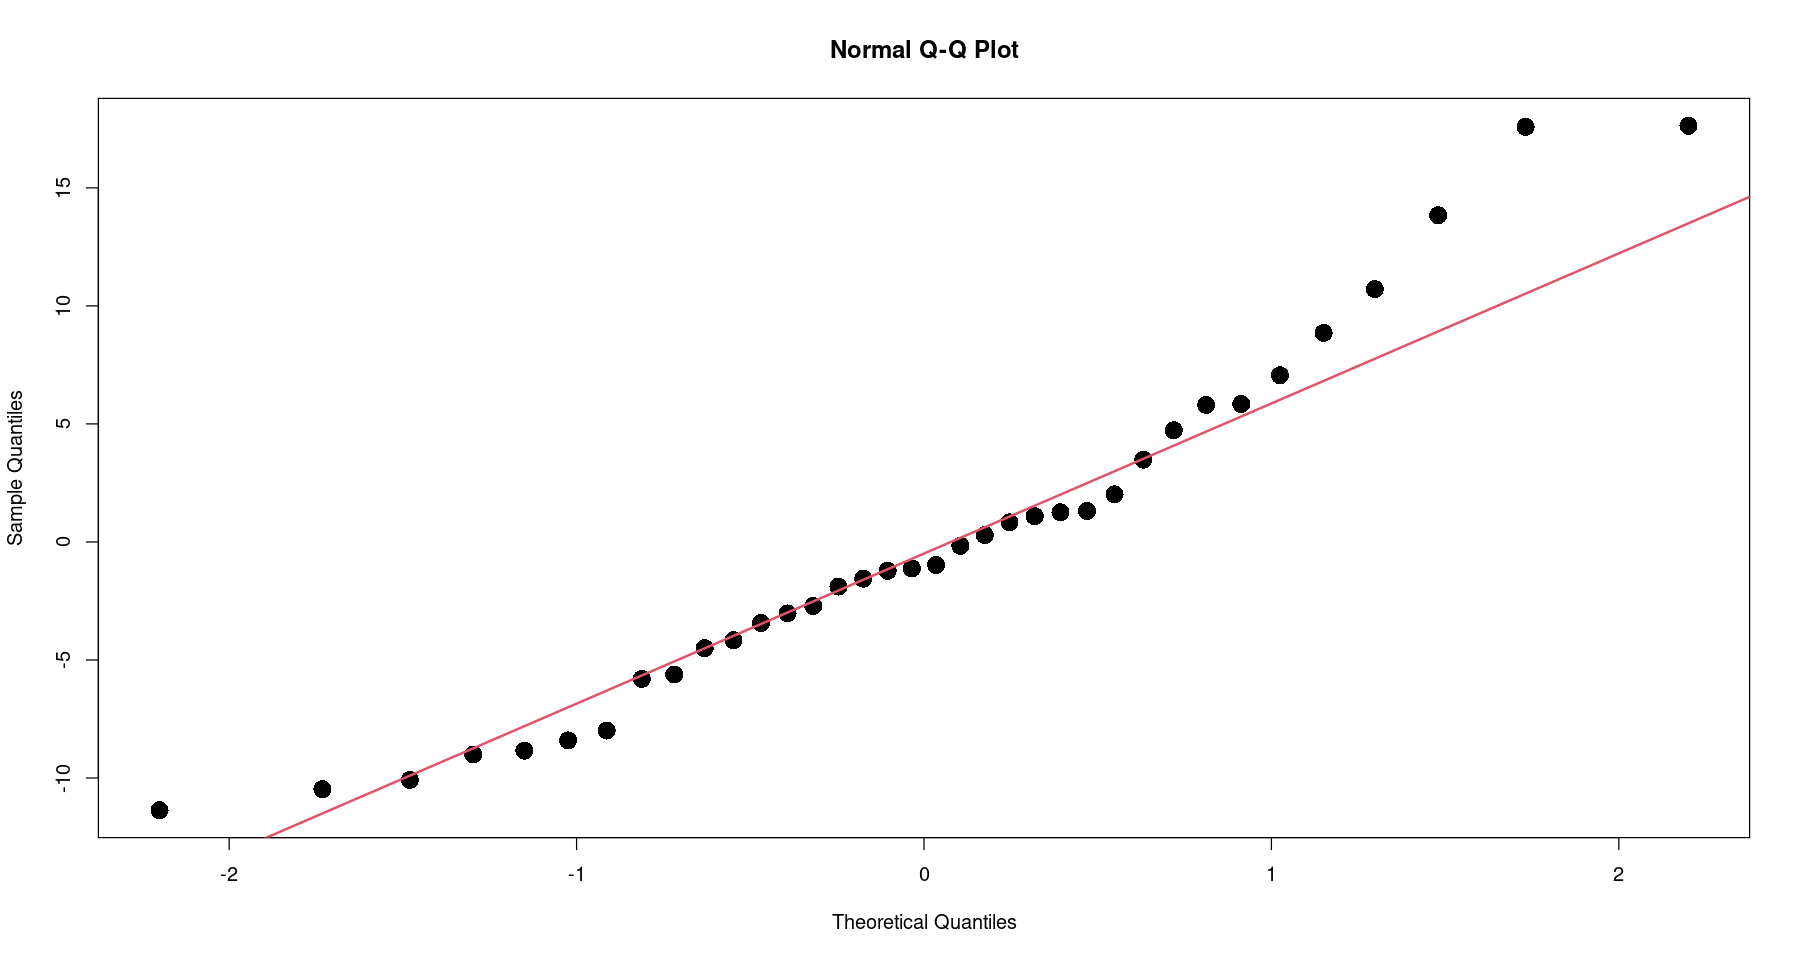

In [35]:
qqnorm(resid(m2), pch=16, cex=2)
qqline(resid(m2), col = 2, lwd=2)


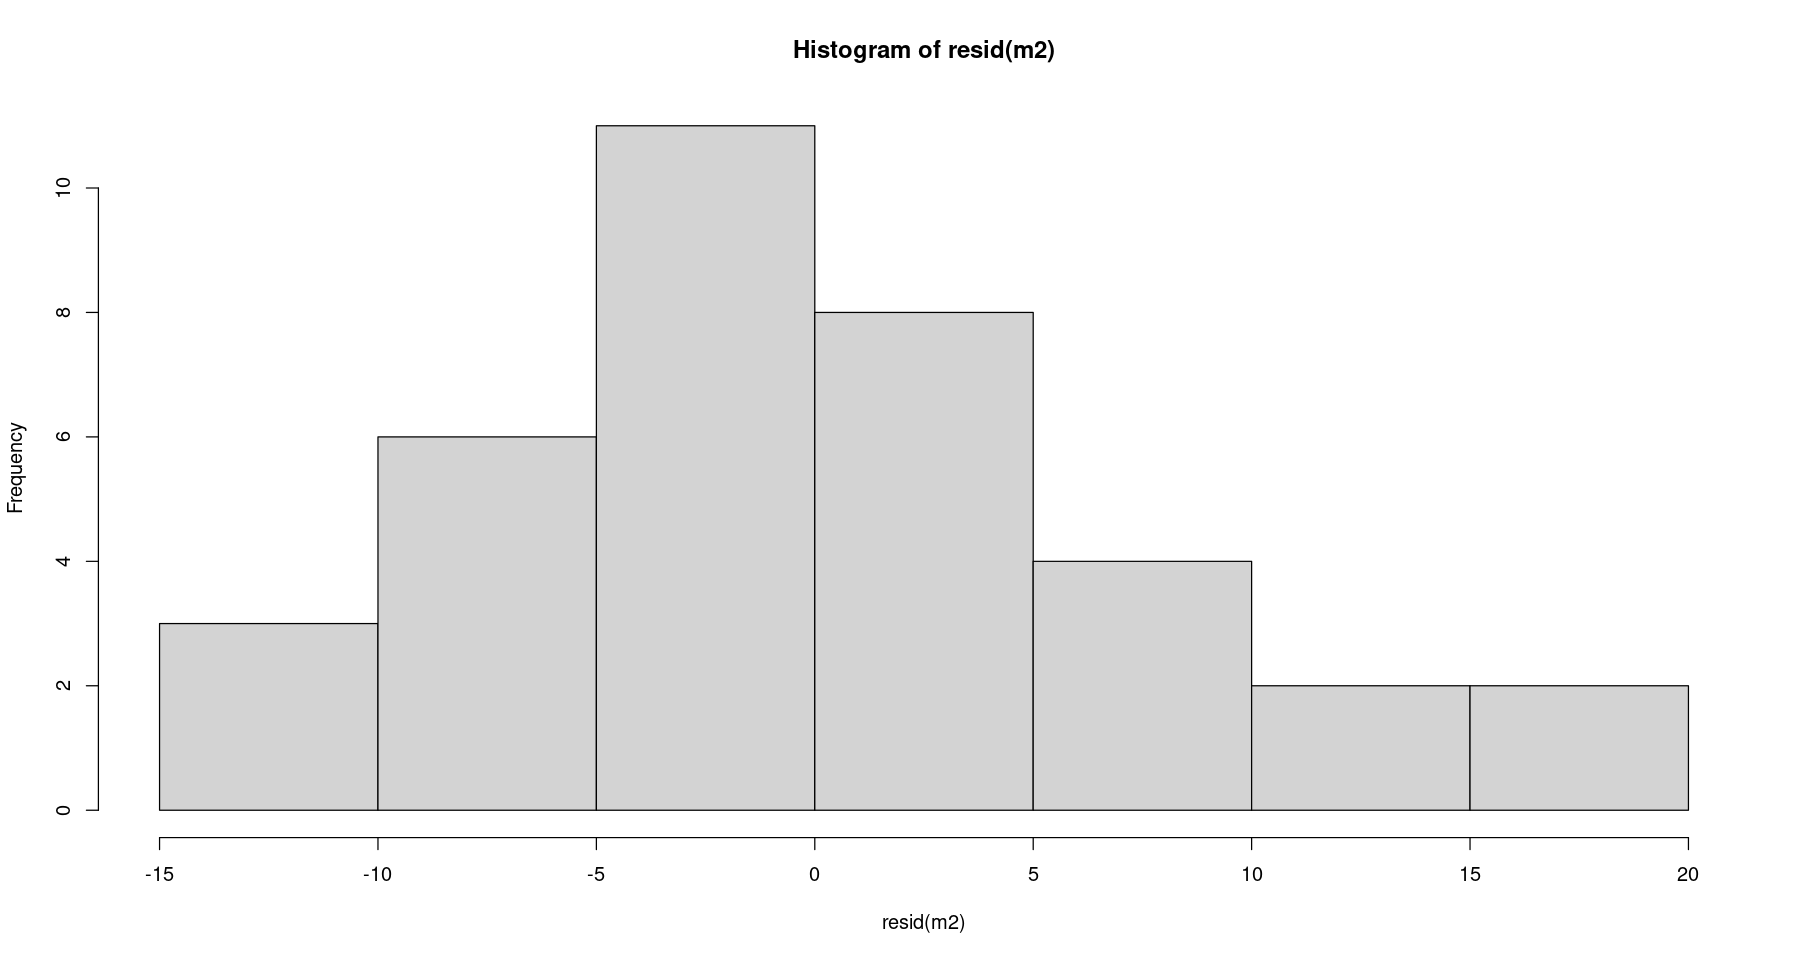

In [36]:
hist(resid(m2))

In [37]:
shapiro.test(resid(m2)) ##shapiro-wilk test


	Shapiro-Wilk normality test

data:  resid(m2)
W = 0.94947, p-value = 0.1007


## 등분산성 검정

In [38]:
bptest(m2)


	studentized Breusch-Pagan test

data:  m2
BP = 8.2455, df = 2, p-value = 0.0162


- 이분산성이다.

# 로그변환 후 2차 추세

$$\text{모형}: ln(Z_t) = \beta_0 + \beta_1 t + \beta_2 t^2 + \epsilon_t, t=1,\dots, n$$

In [39]:
m3 <- lm(log(pop)~t+t2, data=tmp.data)
summary(m3)


Call:
lm(formula = log(pop) ~ t + t2, data = tmp.data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.009306 -0.003520 -0.000374  0.003284  0.010159 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.807e+00  2.360e-03 3307.25   <2e-16 ***
t            2.740e-02  2.942e-04   93.14   <2e-16 ***
t2          -3.004e-04  7.712e-06  -38.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.004461 on 33 degrees of freedom
Multiple R-squared:  0.9994,	Adjusted R-squared:  0.9993 
F-statistic: 2.664e+04 on 2 and 33 DF,  p-value: < 2.2e-16


integer(0)

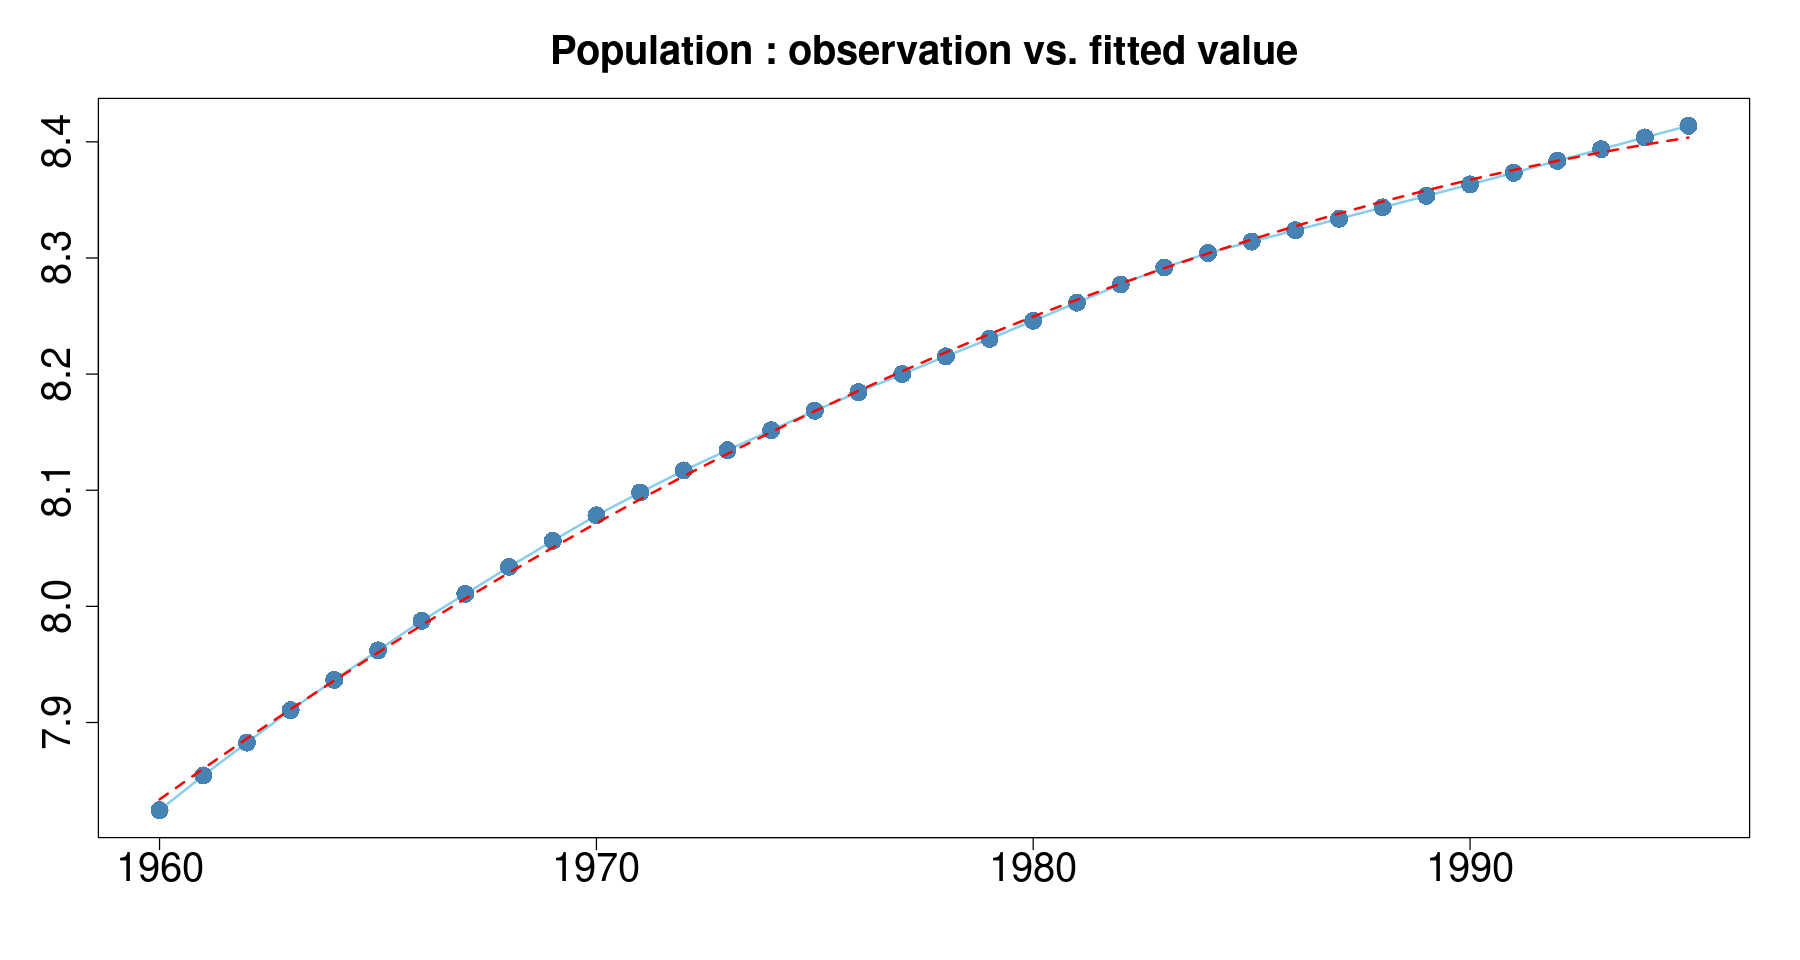

In [40]:
plot(log(pop)~day, tmp.data,
 main = 'Population : observation vs. fitted value',
 xlab="", ylab="",
 type='l',
 col='skyblue',
 lwd=2, cex.axis=2, cex.main=2) +
 points(log(pop)~day, tmp.data, col="steelblue", cex=2, pch=16) +
 lines(tmp.data$day, fitted(m3), col='red', lty=2, lwd=2)


integer(0)

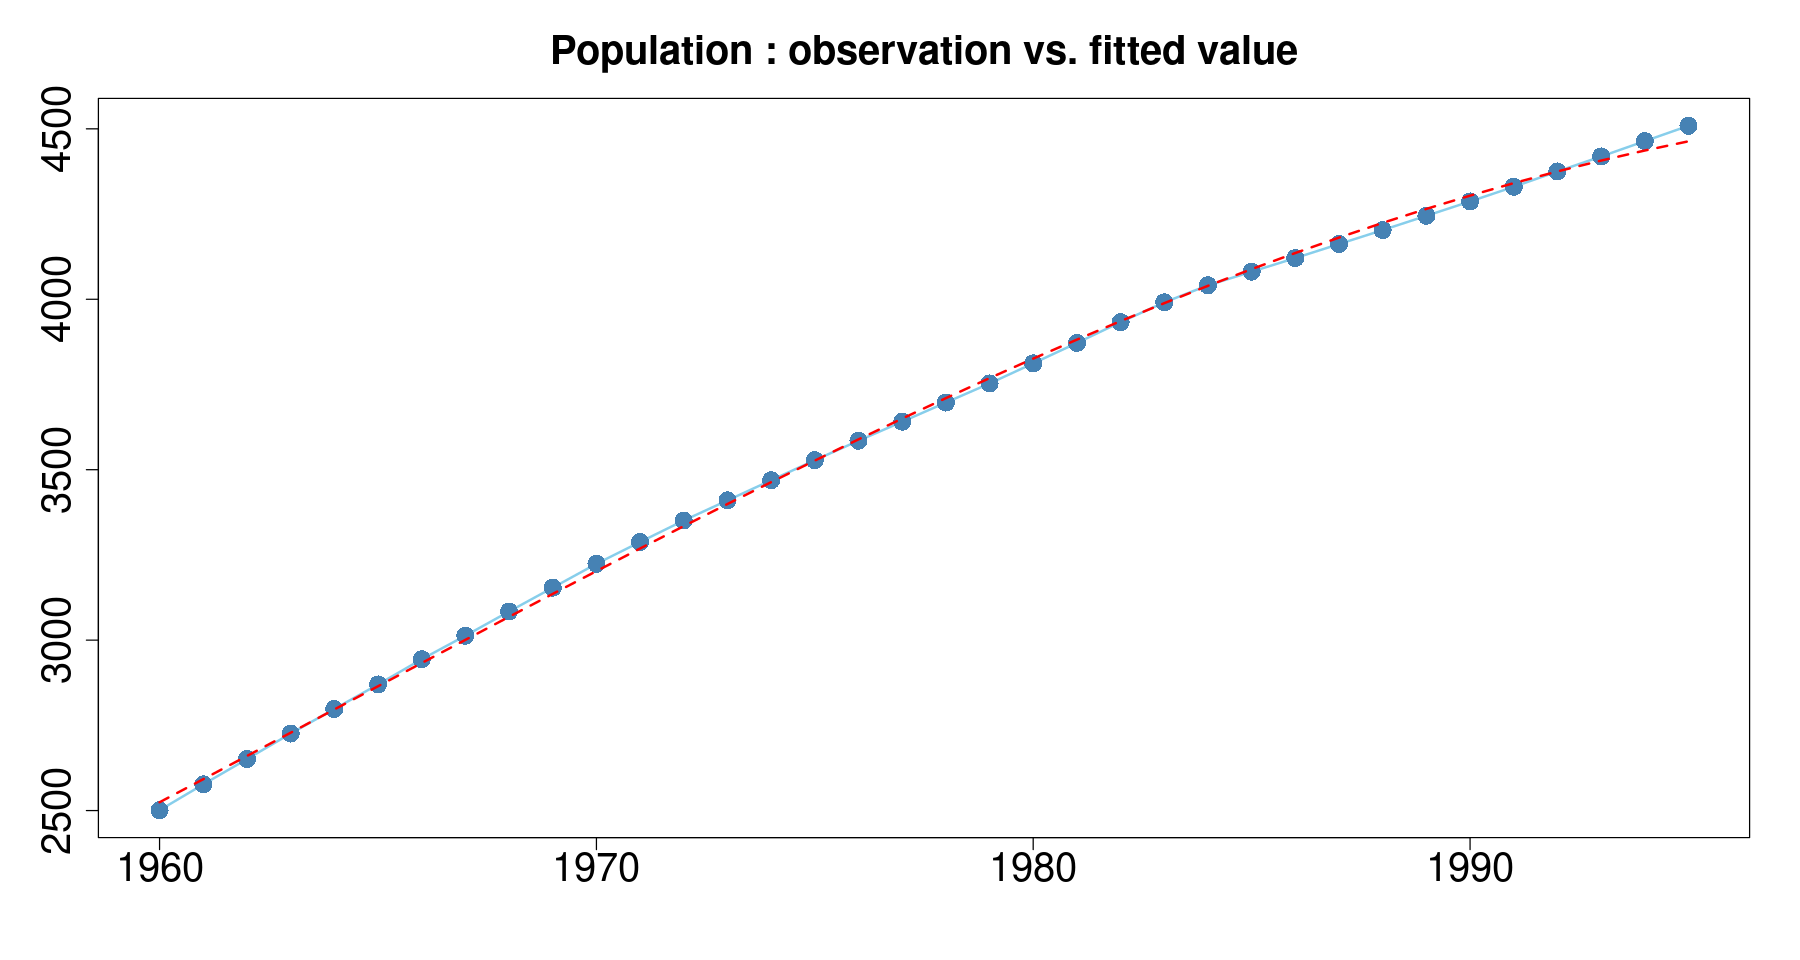

In [41]:
plot(pop~day, tmp.data,
 main = 'Population : observation vs. fitted value',
 xlab="", ylab="",
 type='l',
 col='skyblue',
 lwd=2, cex.axis=2, cex.main=2) +
 points(pop~day, tmp.data, col="steelblue", cex=2, pch=16) +
 lines(tmp.data$day, exp(fitted(m3)), col='red', lty=2, lwd=2)

## 잔차분석

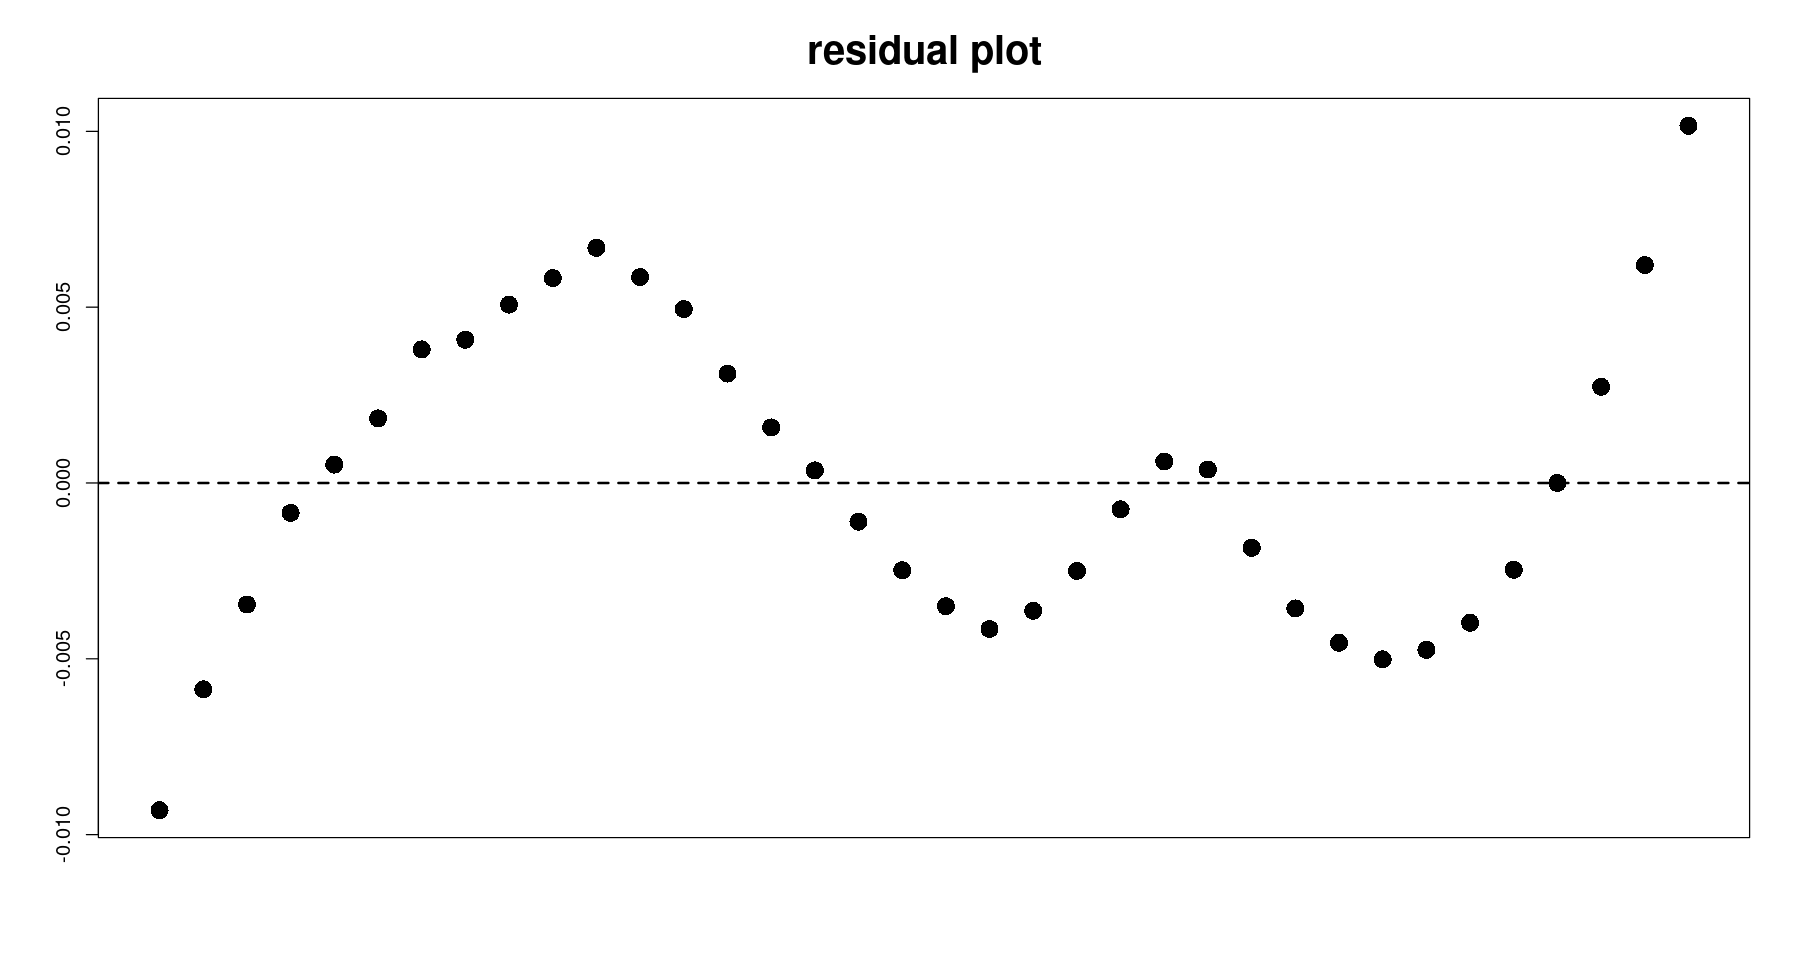

In [42]:
plot(tmp.data$day, resid(m3),
 pch=16, cex=2, xaxt='n',
 xlab="", ylab="", main="residual plot", cex.main=2)
abline(h=0, lty=2, lwd=2)

## 독립성 검정

In [43]:
dwtest(m3,alternative = "two.sided")



	Durbin-Watson test

data:  m3
DW = 0.16493, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is not 0


In [44]:
dwtest(m3,alternative = "greater")



	Durbin-Watson test

data:  m3
DW = 0.16493, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


## 정규성 검정

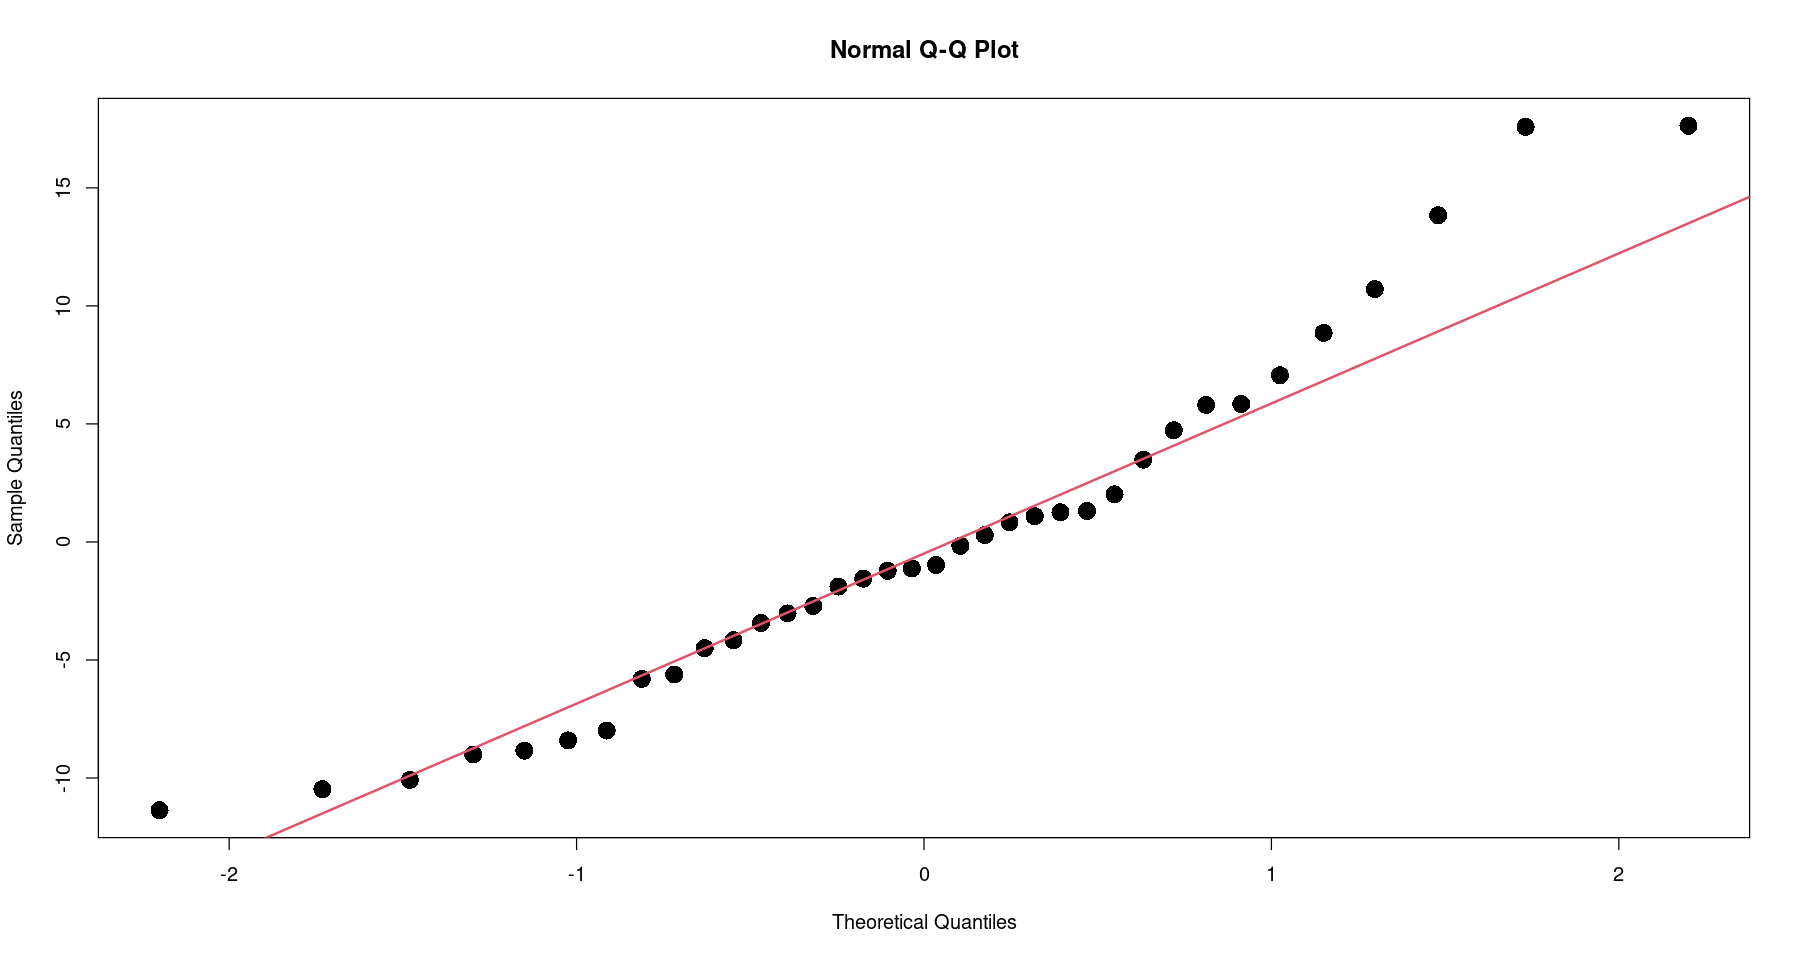

In [45]:
qqnorm(resid(m2), pch=16, cex=2)
qqline(resid(m2), col = 2, lwd=2)


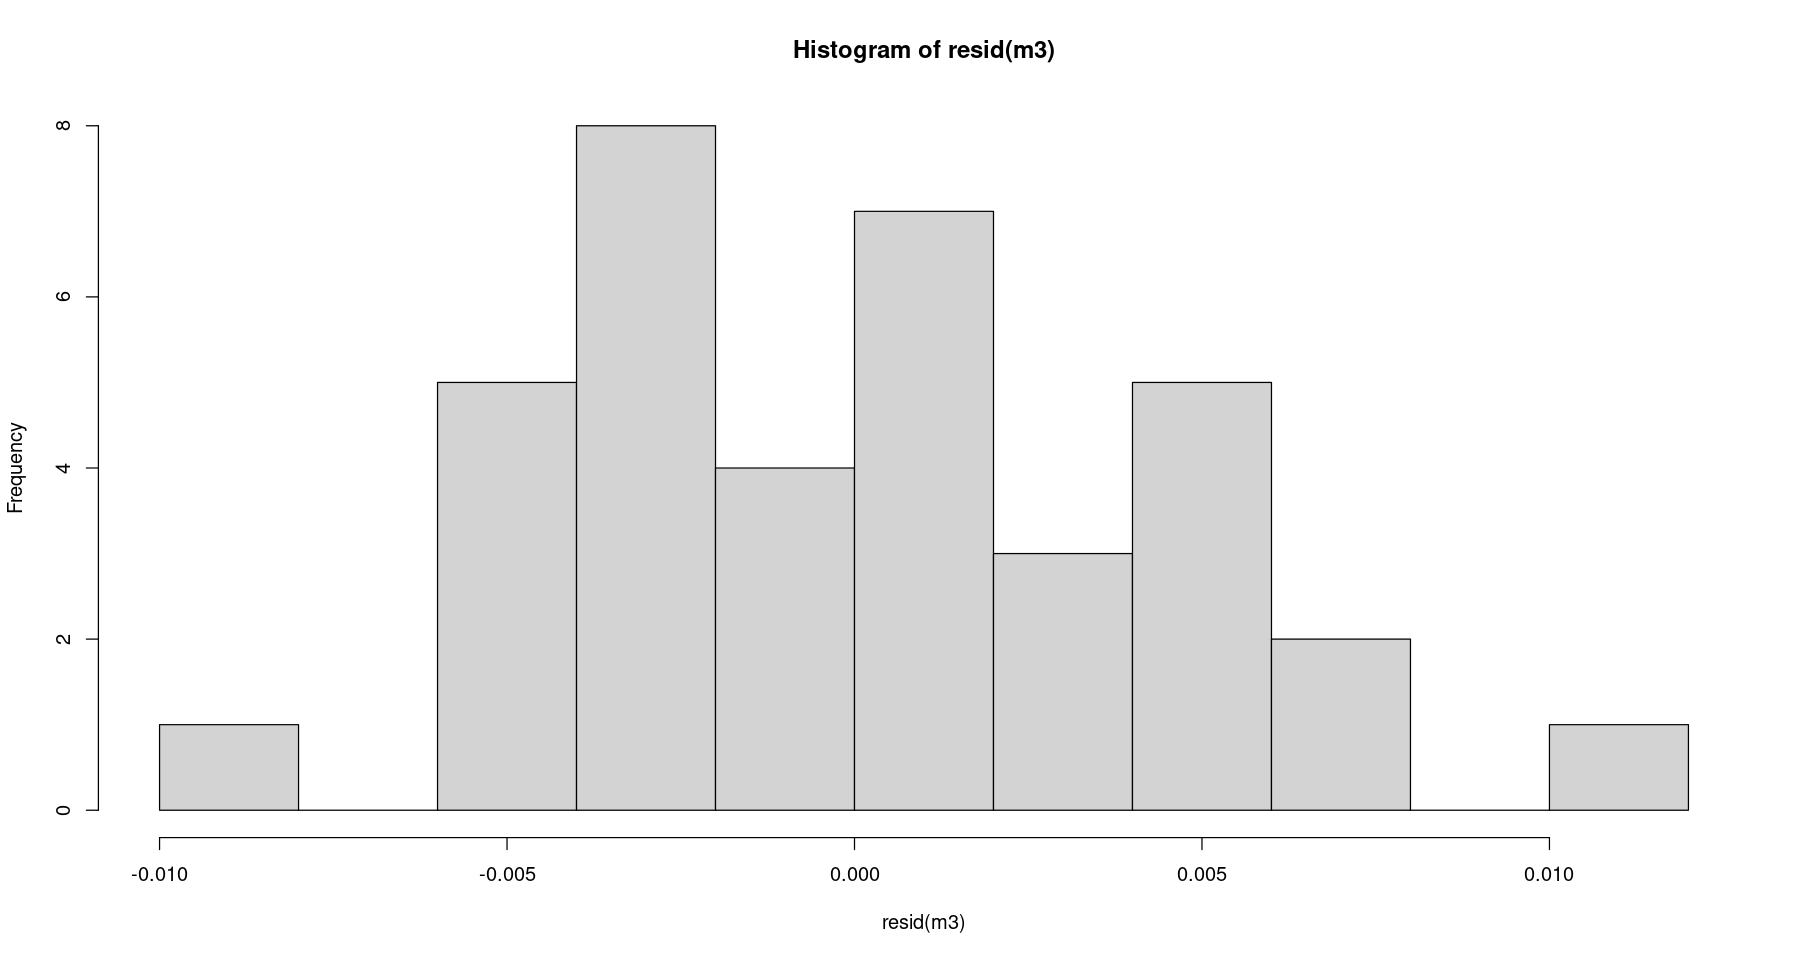

In [46]:
hist(resid(m3))

In [47]:
shapiro.test(resid(m3))


	Shapiro-Wilk normality test

data:  resid(m3)
W = 0.97547, p-value = 0.5922


## 등분산성 검정

In [48]:
bptest(m3)



	studentized Breusch-Pagan test

data:  m3
BP = 8.8866, df = 2, p-value = 0.01176
